In [1]:
import numpy as np 
from scipy.io import netcdf as Dataset
import matplotlib.pyplot as plt
import pickle
import datetime as datetime
DATAFILE="arm_d03.pcl"


In [2]:
# Get the file from MCS
import os.path as pathfile
if(not pathfile.exists(DATAFILE)):
    print('Retriving file')
    import urllib
    urllib.request.urlretrieve("https://www.mcs.anl.gov/~emconsta/NWP_revolving/"+DATAFILE, DATAFILE)
else:
    print('Data file found')

Retriving file


In [3]:
fp = open(DATAFILE, 'rb')
Coords=pickle.load(fp)
Wind=pickle.load(fp)
Ambient=pickle.load(fp)
fp.close()

Times=Coords['Times']
DLat=Coords['Latitude']
DLon=Coords['Longitude']
HeightLevels=Coords['HeightLevels']
HGT=Coords['HGT']

W=Wind['W']
U=Wind['U']
V=Wind['V']

T=Ambient['T']
RHO=Ambient['RHO']
TSkin=Ambient['TSkin']


print('Shape of Lat, Lon {:}'.format(DLat.shape))
print(' - distance for each grid point (horizontal): 1Km x 1Km')

print('Shape of 4D fields U,V,T {:} organized as t,z,y,x'.format(U.shape))

print('Height above ground (t,y,x): {:}; max: {:} - min {:}'.format(HeightLevels.shape,np.max(HeightLevels),np.min(HeightLevels)))

zt=''
for zi in Times[0]:
    zt=zt+zi.decode()
print('Start time    : {:} UTC'.format(zt))

zt=''
for zi in Times[1]:
    zt=zt+zi.decode()
print('Time increpent: {:} UTC'.format(zt))

zt=''
for zi in Times[-1]:
    zt=zt+zi.decode()
print('End time      : {:} UTC'.format(zt))

Shape of Lat, Lon (56, 56)
 - distance for each grid point (horizontal): 1Km x 1Km
Shape of 4D fields U,V,T (721, 35, 56, 56) organized as t,z,y,x
Height above ground (t,y,x): (721, 35, 56, 56); max: 7240.068359375 - min 20.82794189453125
Start time    : 2017-08-12_18:00:00 UTC
Time increpent: 2017-08-12_18:01:02 UTC
End time      : 2017-08-13_06:00:00 UTC


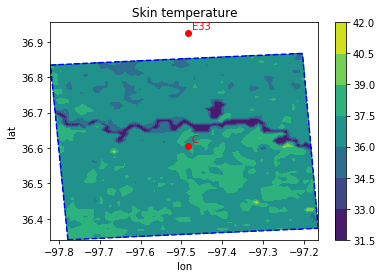

In [4]:
#ARM Sites
SlrStat=[[36.+55./60.+31.8/3600.,-(97.+29./60.+6/3600.)],\
             [36.+36./60.+18./3600.,-(97.+29./60.+6./3600.)]] 
SlrStatStr=['E33','C']
for i in range(len(SlrStat)):
    plt.plot(SlrStat[i][1],SlrStat[i][0],'ro')
    plt.text(SlrStat[i][1]+0.01,SlrStat[i][0]+0.01,SlrStatStr[i],color="red")

#NWP domain
mm=DLat.shape
plt.plot(DLon[0,:],DLat[0,:],'--',color='b')
plt.plot(DLon[mm[0]-1,:],DLat[mm[0]-1,:],'--',color='b')
plt.plot(DLon[:,mm[1]-1],DLat[:,mm[1]-1],'--',color='b')
plt.plot(DLon[:,0],DLat[:,0],'--',color='b')

plt.contourf(DLon,DLat,np.squeeze(TSkin[10,:,:]-273.15))
plt.colorbar()
plt.title('Skin temperature')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()